<hr>
<h2>Постановка задачи</h2>

Есть предположение о том, что в ЖК "Ренессанс (Москва)" средняя цена за квадратный метр может отличаться в зависимости от этажа.
<ul>
    <li><b>Проверяем следующие гипотезы</b></li>
    <ul>
        <li>Есть ли зависимость цены квадратного метра от этажа, на котором расположен объект недвижимости.</li>
        <li>Имеют ли статистически значимые различия средней цены кв. метра на разных этажах.</li>
    </ul>
    
**Примечание:** Я не буду нагружать данный ноутбук информацией с дополнительными проверками всех возможных зависимых и независимых переменных, которые не имеют отношения к проверке гипотез, а сделаю акцент, только на тех параметрах, которые необходимы для целей поставленной задачи. Соответственно, будут задействованы только две переменные - Цена кв. метра и Этаж.
</ul>

### Общедоступная информация о ЖК Ренессанс

ЖК премиум-класса "Ренессанс" возведен в старинном районе Сокольники, рядом с легендарным парком "Сокольники". ЖК "Ренессанс" состоит из 2 клубных домов, в которых представлено более 80 планировок — от 1-комнатных квартир до 2-уровневых пентхаусов с каминами и собственными террасами на крыше, откуда открываются потрясающие виды. В квартирах выполнена премиальная отделка "под ключ". Из панорамных окон открываются красивые виды на столицу, парк "Сокольники", излучины реки Яузы. ЖК "Ренессанс" объединяет все преимущества современного элитного жилья: удачная локация, стильные архитектурные решения, развитая инфраструктура, подземный паркинг, ландшафтный двор-парк с фонтаном, детскими и спортивными площадками, фитнес-центр с бассейнами.

- Дата сдачи: 2021
- Класс дома: Премиум
- Этажность: от 14 до 20
- Кол-во корпусов: 2 корпуса
- Тип дома: Монолитный
- Высота потолков: 3,4 м
- Отделка: Без отделки, чистовая
<hr>
- Всего **180 квартир** от застройщика в ЖК «Ренессанс»

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as ss
import statsmodels as sm
import statsmodels.stats.multicomp as mc
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

%matplotlib inline

#задаем размер графика
sns.set(rc={'figure.figsize' : (6, 4)})

In [2]:
#считываем таблицу в переменную
df = pd.read_csv('new_history_03042023.csv', sep=';', encoding='cp1251', engine="python")

<hr>
<h2>Предобработка данных</h2>

In [3]:
#преобразовываем данные к нужным типам
df['ID Корпуса'] = df['ID Корпуса'].astype('string')
df['ID ЖК'] = df['ID ЖК'].astype('string')
df['ЖК рус'] = df['ЖК рус'].astype('string')
df['ЖК англ'] = df['ЖК англ'].astype('string')
df['Корпус'] = df['Корпус'].astype('string')
df['кр Корпус'] = df['кр Корпус'].astype('string')
df['Регион'] = df['Регион'].astype('string')
df['ID кв'] = df['ID кв'].astype('string')
df['Дата актуализации'] = df['Дата актуализации'].astype('datetime64')
df['Комнат'] = df['Комнат'].astype('int64')
df['Площадь'] = df['Площадь'].astype('string')
df['Цена'] = df['Цена'].astype('float64')
df['Цена кв м'] = df['Цена кв м'].astype('float64')
df['Этаж'] = df['Этаж'].astype('float64')
df['Номер на этаже'] = df['Номер на этаже'].astype('string')
df['Номер в корпусе'] = df['Номер в корпусе'].astype('string')
df['Номер секции'] = df['Номер секции'].astype('string')
df['Адрес корп'] = df['Адрес корп'].astype('string')
df['lat'] = df['lat'].astype('string')
df['lng'] = df['lng'].astype('string')
df['Район Город'] = df['Район Город'].astype('string')
df['Округ Направление'] = df['Округ Направление'].astype('string')
df['АТД'] = df['АТД'].astype('string')
df['Источник'] = df['Источник'].astype('string')
df['Тип корпуса'] = df['Тип корпуса'].astype('string')
df['Класс К'] = df['Класс К'].astype('string')
df['Тип кв/ап'] = df['Тип кв/ап'].astype('string')
df['Застройщик'] = df['Застройщик'].astype('string')
df['Тип помещения'] = df['Тип помещения'].astype('string')
df['Отделка помещения'] = df['Отделка помещения'].astype('string')
df['Отделка К'] = df['Отделка К'].astype('string')
df['Договор К'] = df['Договор К'].astype('string')
df['Сдача К'] = df['Сдача К'].astype('string')
df['Стадия К'] = df['Стадия К'].astype('string')
df['Цена со скидкой'] = df['Цена со скидкой'].astype('float64')
df['Зона'] = df['Зона'].astype('string')
df['Отделка текст'] = df['Отделка текст'].astype('string')
df['Старт продаж К'] = df['Старт продаж К'].astype('string')
df['Изменение цены последнее'] = df['Изменение цены последнее'].astype('float64')
df['Экспозиция'] = df['Экспозиция'].astype('int64')
df['Изменение цены'] = df['Изменение цены'].astype('float64')
df['Жилая площадь'] = df['Жилая площадь'].astype('string')
df['Площадь кухни'] = df['Площадь кухни'].astype('string')
df['ID дом.рф'] = df['ID дом.рф'].astype('string')
df['Высота потолков'] = df['Высота потолков'].astype('int64')

In [4]:
#создаем новый столбец
df['Этаж_как_строка'] = df['Этаж'].astype('string')

In [5]:
#добавляем лидирующий ноль к строке с одним символом
df['Этаж_как_строка'] = df['Этаж_как_строка'].str.replace('.0','', regex=False).str.zfill(2)

In [6]:
#переименовываем столбцы
for i in range(len(df.columns)):
    df = df.rename(columns={df.columns[i] : df.columns[i].replace(' ', '_')})

In [7]:
#делаем преобразование для столбцов, которые не удалось преобразовать штатным образом 

df['Площадь'] = df['Площадь'].str.replace(',', '.')
df['Площадь'] = df['Площадь'].astype('float64')

df['Старт_продаж_К'] = df['Старт_продаж_К'].astype('string')
df['Старт_продаж_К'] = pd.to_datetime(df['Старт_продаж_К'])

df['Жилая_площадь'] = df['Жилая_площадь'].str.replace(',', '.')
df['Жилая_площадь'] = df['Жилая_площадь'].astype('float64')

df['Площадь_кухни'] = df['Площадь_кухни'].str.replace(',', '.')
df['Площадь_кухни'] = df['Площадь_кухни'].astype('float64')

In [8]:
#проверяем количество строк и столбцов в таблице
df.shape

(173821, 46)

In [9]:
#ПРИ НЕОБХОДИМОСТИ сохраняем файл для Tableau

#df.to_csv('for_tableau.csv', encoding='cp1251')

<hr>
<h3>Предподготовка к проверке гипотез</h3>

In [10]:
#задаем переменные для отбора, где:
# - отберем застройщика и ЖК
# - отберем только квартиры и апартаменты

developer = ['УНР 494']
re = ['Ренессанс (Москва)']
obj_type = ['Квартира', 'Апартамент', 'Кв/ап']
df_cur_dev = df.query('Застройщик in @developer and ЖК_рус in @re and Тип_помещения in @obj_type')\
                [['Этаж', 'Этаж_как_строка', 'Цена_кв_м']]
df_cur_dev.head(5)

,Этаж,Этаж_как_строка,Цена_кв_м
47771,2.0,02,610130.0
47772,3.0,03,615950.0
47773,4.0,04,628180.0
47774,5.0,05,647000.0
47775,6.0,06,653000.0


In [11]:
#сколько всего квартир по ЖК Ренессанс в нашем датасете?
df_cur_dev.shape[0]

154

По общедоступной информации всего в ЖК 180 квартир и 154 из них мы имеем в датасете для проверки гипотез
<hr>

In [12]:
#сколько квартир на каждом этаже?
df_cur_dev.groupby('Этаж_как_строка', as_index=False)\
        .agg({'Цена_кв_м':'count'})\
        .rename(columns={'Цена_кв_м':'Количество квартир', 'Этаж_как_строка':'Этаж'})

,Этаж,Количество квартир
0,02,8
1,03,8
2,04,11
3,05,10
4,06,10
5,07,9
6,08,10
7,09,10
8,10,11
9,11,8


Text(35.0, 0.5, 'Цена кв. метра')

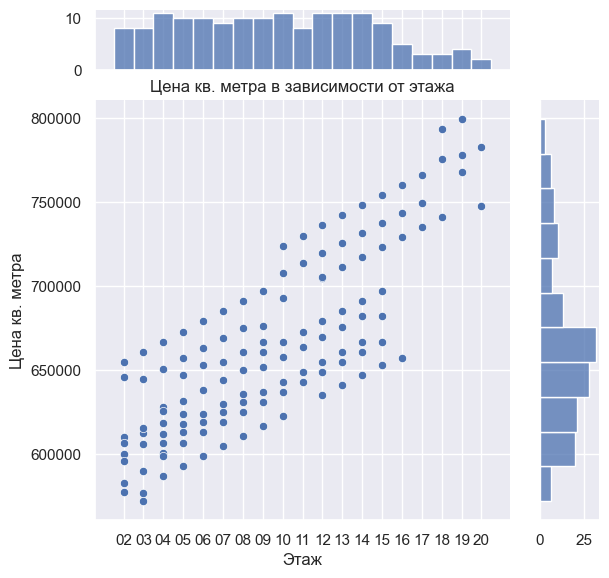

In [13]:
#Построим диаграмму распределения цен за кв. метр в разрезе этажа
sns.jointplot(data=df_cur_dev.sort_values(by='Этаж'), y='Цена_кв_м',x='Этаж_как_строка', 
              space=0.5, marginal_ticks=True)
plt.title('Цена кв. метра в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена кв. метра')

- В центре расположен график цены за кв. метр в разрезе этажей.
- Вверху над центральным графиком расположен график распределения количества предложений по каждому этажу. 
- Справа расположен график распределения количества предложений по указанной цене за кв. метр.

- Для проверки гипотез имеется 154 квартиры из 180.
- Доступных предложений квартир или апартаментов для покупки имеется на 19 этажах (с 2 по 20).
- Можем наблюдать повышательный эффект цены кв. метра с возрастанием этажа.
- Начиная с 16 этажа количество предложений начинает сокращаться.
- Этаж 16 имеет минимальную цену в районе 650 000 руб., а затем следующее предложение в районе 740 000 руб., что может помешать справедливой оценке средних, т.к. на руках мы имеем данные только по оставшимся квартирам, которые находятся в предложении на покупку, а не все квартиры, которые есть в ЖК. 
- Выше 16-го этажа количество квартир очень мало, что также не очень хорошо может повлиять не проверку гипотез. Следовательно, т.к. у нас нет информации о том, на каких этажах были проданы квартиры, то далее мы будем использовать доверительные интервалы для оценки средних цен за кв. метр.

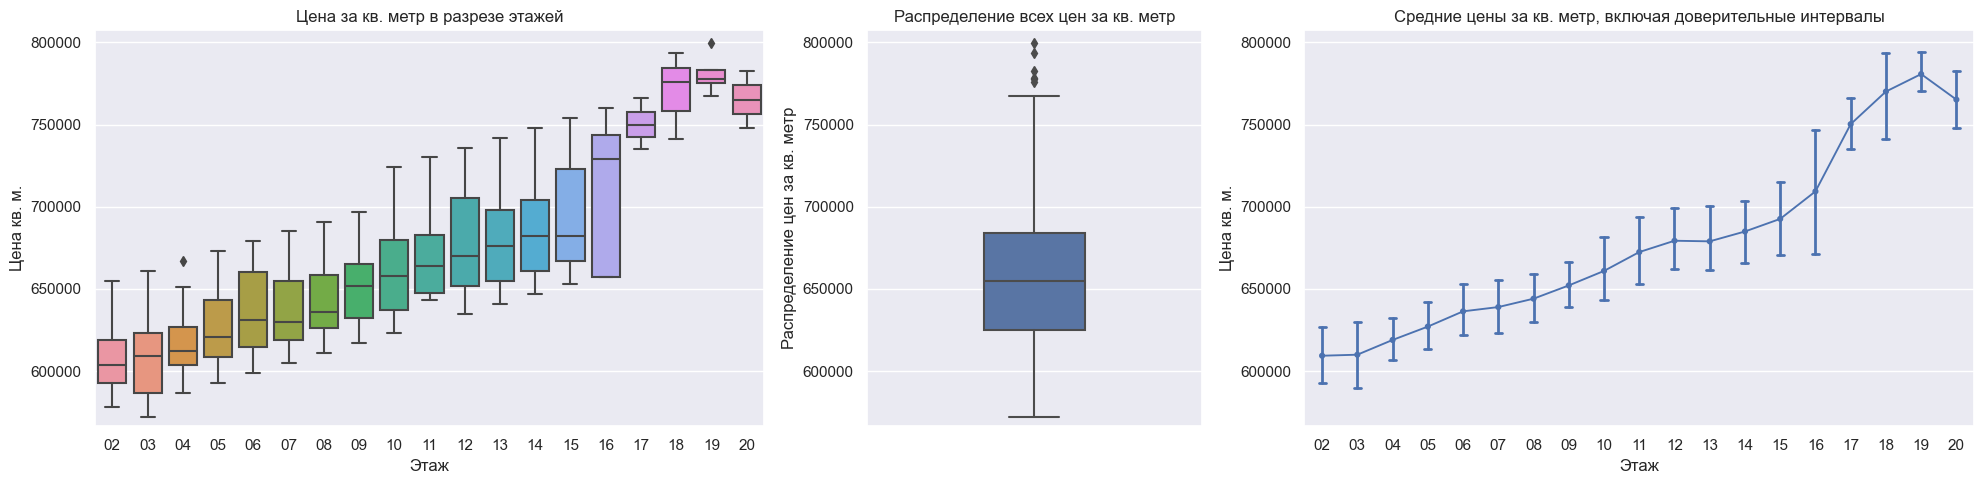

In [14]:
y_lim_max = df_cur_dev.Цена_кв_м.max()+df_cur_dev.Цена_кв_м.max()*0.01
y_lim_min = df_cur_dev.Цена_кв_м.min()-df_cur_dev.Цена_кв_м.min()*0.01


fig, axs = plt.subplots(ncols=3, gridspec_kw={'width_ratios': [2, 1, 2]}, figsize=(20, 5))

sns.boxplot(data=df_cur_dev.sort_values(by='Этаж_как_строка'), 
            x='Этаж_как_строка',
            y='Цена_кв_м', 
            ax=axs[0])
axs[0].set_ylabel('Цена кв. м.')
axs[0].set_xlabel('Этаж')
axs[0].set_title('Цена за кв. метр в разрезе этажей')
axs[0].set_ylim(y_lim_min, y_lim_max)

sns.boxplot(data=df_cur_dev, y=df_cur_dev['Цена_кв_м'], width=0.3, ax=axs[1])
axs[1].set_ylabel('Распределение цен за кв. метр')
axs[1].set_title('Распределение всех цен за кв. метр')
axs[1].set_ylim(y_lim_min, y_lim_max)

sns.pointplot(data=df_cur_dev.sort_values(by='Этаж'),
            y='Цена_кв_м',x='Этаж_как_строка', ax=axs[2], capsize = .2, scale=0.5, errwidth=2)
axs[2].set_ylabel('Цена кв. м.')
axs[2].set_xlabel('Этаж')
axs[2].set_title('Средние цены за кв. метр, включая доверительные интервалы')
axs[2].set_ylim(y_lim_min, y_lim_max)

fig.tight_layout()

plt.show()

#### Пояснение к графику средних цен:
Из-за того, что в проверке гипотез участвуют только те квартиры, которые есть в доступности на покупку, то мы не можем напрямую делать оценку средней цены за кв. метр. Поэтому мы вынуждены применять доверительные интервалы как дополнительную оценку диапазона, в котором могла бы лежать средняя цена квадратного метра.

In [15]:
df_cur_dev['Цена_кв_м'].describe()

count       154.000000
mean     662569.915584
std       50095.261252
min      572200.000000
25%      625000.000000
50%      655000.000000
75%      684250.000000
max      799391.000000
Name: Цена_кв_м, dtype: float64

- Рассматривая распределение цен за кв. метр по ЖК в совокупности, можем отметить, что 
    - 25% всех цен находятся ниже 625000
    - 25% всех цен находятся выше 684250
- Наблюдаются выбросы  цены в районе 775000 - 800000

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

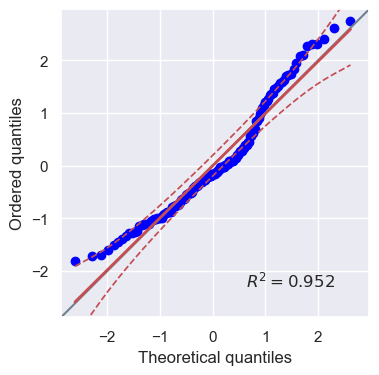

In [16]:
pg.qqplot(df_cur_dev['Цена_кв_м'], dist='norm')

График распределения квантилей демонстрирует, что цены распределены нормальным образом вокруг линии регрессии, что также подтверждается показателем R^2 = 0.952.

Для проверки гипотезы о том, что средние цены за кв. метр на каждом этаже статистически имеют или не имеют различия, необходимо соблюсти следующие условия:
<ul>
    <li>Дисперсии внутри групп должны быть примерно одинаковы.</li>
    <li>Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.</li>
    <li>Для теста на нормальность будем использовать тест Шапиро-Уилка. Но для этого нам придется отбросить из эксперимента те этажи, где количество квартир меньше 3 (как минимально допустимое значение для проведения теста).</li>
</ul>

In [17]:
#отберем только те этажи, где к-во квартир больше 3
floors = df_cur_dev.groupby('Этаж_как_строка', as_index=False)\
            .agg({'Цена_кв_м':'count'})\
            .rename(columns={'Цена_кв_м':'Количество_квартир'}).query('Количество_квартир > 2').Этаж_как_строка
df_cur_dev = df_cur_dev.query('Этаж_как_строка in @floors')

In [18]:
#проверим цены на нормальность распределения по каждому этажу
for i in floors.unique():
    shapiro_test = ss.shapiro(df_cur_dev.query('Этаж_как_строка == "{}"'.format(i)).Цена_кв_м).pvalue
    print('Этаж {}'.format(i).ljust(10), 
          'pvalue = {}'.format(shapiro_test).ljust(30), 
          'Нормальность = {}'.format(shapiro_test > 0.05), 
          sep=' || ')

Этаж 02    || pvalue = 0.26561239361763      || Нормальность = True
Этаж 03    || pvalue = 0.6598117351531982    || Нормальность = True
Этаж 04    || pvalue = 0.4476635456085205    || Нормальность = True
Этаж 05    || pvalue = 0.677340030670166     || Нормальность = True
Этаж 06    || pvalue = 0.5221503376960754    || Нормальность = True
Этаж 07    || pvalue = 0.6235815286636353    || Нормальность = True
Этаж 08    || pvalue = 0.50328129529953      || Нормальность = True
Этаж 09    || pvalue = 0.9098756909370422    || Нормальность = True
Этаж 10    || pvalue = 0.23603057861328125   || Нормальность = True
Этаж 11    || pvalue = 0.08142360299825668   || Нормальность = True
Этаж 12    || pvalue = 0.5249696969985962    || Нормальность = True
Этаж 13    || pvalue = 0.23603057861328125   || Нормальность = True
Этаж 14    || pvalue = 0.23603057861328125   || Нормальность = True
Этаж 15    || pvalue = 0.2511633634567261    || Нормальность = True
Этаж 16    || pvalue = 0.14143477380275726   || 

Тест показал, что цены за кв. метр на отобранных этажах соответствуют нормальному распределению.

In [19]:
#проверяем одинаковость дисперсий
pg.homoscedasticity(df_cur_dev, dv="Цена_кв_м", group="Этаж_как_строка")

,W,pval,equal_var
levene,0.728116,0.76963,True


Показатель pval = 0.765257, что является больше уровня значимости в 0.05. Это значит, что дисперсии в группах одинаковы. Т.е. разброс цен примерно одинаков по каждому этажу и не имеет сильно выраженных выбросов.

<hr>
<h3>Проверка гипотезы на линейную регрессию</h3>
<ul>
    <li>H0 - НЕТ корреляции между этажом и ценой квадратного метра.</li>
    <li>H1 - Существует корреляция между этажом и ценой квадратного метра.</li>
<ul>

In [20]:
#запишем модель 
model = smf.ols(formula = "Цена_кв_м ~ Этаж", data = df_cur_dev).fit()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Цена_кв_м   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     229.0
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           5.34e-32
Time:                        19:09:09   Log-Likelihood:                -1786.1
No. Observations:                 152   AIC:                             3576.
Df Residuals:                     150   BIC:                             3582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.824e+05   5780.221    100.757      0.0

В правом верхнем углу можем видеть показатель R-squared, который равен 0.604, что означает, что из всех наблюдений только 60.4% квартир имеют положительную корреляцию между этажом и ценой за кв. метр в ЖК "Ренессанс (Москва)".

Показатель P>|t| = 0, что дает нам основания отклонить нулевую гипотезу (H0).

<hr>
<h3>Проверка гипотезы на различие средних цен за кв. метр в зависимости от этажа</h3>
<ul>
    <li>H0 - Ни одно из выборочных средних не отличается от другого (нет различий).</li>
    <li>H1 - Хотя бы одно выборочное среднее цены за кв. метр отличается от других (есть различия как минимум между двумя этажами).</li>
<ul>

In [22]:
anova_result = pg.anova(data=df_cur_dev, dv='Цена_кв_м', between='Этаж')
anova_result

,Source,ddof1,ddof2,F,p-unc,np2
0,Этаж,17,134,15.401495,8.115447e-24,0.661467


In [23]:
if anova_result['p-unc'].values[0] <= 0.05:
    print('Отклоняем H0, p-value < уровня альфа в 0.05 и составляет', anova_result['p-unc'].values[0])
else:
    print('Принямаем H0, p-value > уровня альфа в 0.05 и составляет', anova_result['p-unc'].values[0])

Отклоняем H0, p-value < уровня альфа в 0.05 и составляет 8.115447086210132e-24


Нас интересует показатель p-unc (он же pvalue), который равен 8.115447e-24 (запись числа в научной нотации). Это значение не превышает уровень значимости в 0.05. Следовательно, хотя бы в одной из пар этажей есть стат значимые различия в средних ценах за кв. метр. Проведем тест, сравнивая попарно каждый этаж.

In [24]:
pd.set_option('display.max_rows', None)
mul_comp = pd.DataFrame(MultiComparison(df_cur_dev.Цена_кв_м, df_cur_dev.Этаж).tukeyhsd().summary()).drop(0)\
.rename(columns={0:'group1', 
                 1 :'group2',
                 2 :'meandiff',
                 3 :'p-adj',
                 4 :'lower',
                 5 :'upper',
                 6 :'reject'})

mul_comp

,group1,group2,meandiff,p-adj,lower,upper,reject
1,2.0,3.0,617.5,1.0,-53182.475,54417.475,False
2,2.0,4.0,9592.7273,1.0,-40404.6858,59590.1404,False
3,2.0,5.0,17720.0,0.9988,-33319.1377,68759.1377,False
4,2.0,6.0,27005.0,0.9132,-24034.1377,78044.1377,False
5,2.0,7.0,29605.0,0.8568,-22679.1777,81889.1777,False
6,2.0,8.0,34705.0,0.5947,-16334.1377,85744.1377,False
7,2.0,9.0,42762.1,0.2247,-8277.0377,93801.2377,False
8,2.0,10.0,51595.0,0.0354,1597.5869,101592.4131,True
9,2.0,11.0,63067.5,0.0066,9267.525,116867.475,True
10,2.0,12.0,69959.5455,0.0003,19962.1324,119956.9585,True


In [25]:
mul_comp.to_csv("output.csv", index=False)
df_mul_comp = pd.read_csv("output.csv")

In [26]:
print('Результаты теста на попарное сравнение средних цен за кв. метр с каждым этажом показали, что:')
print(df_mul_comp.query('reject == False').shape[0], 'пар этажей не имеют стат значимых различий в средних ценах за кв. метр')
print(df_mul_comp.query('reject == True').shape[0], 'пар этажей имеют стат значимые различия в средних ценах за кв. метр')

Результаты теста на попарное сравнение средних цен за кв. метр с каждым этажом показали, что:
82 пар этажей не имеют стат значимых различий в средних ценах за кв. метр
71 пар этажей имеют стат значимые различия в средних ценах за кв. метр


<hr>

## Посмотрим на самую маленькую и самую большую разницу

In [27]:
df_mul_comp.query('reject == True').query('meandiff == meandiff.min()')

,group1,group2,meandiff,p-adj,lower,upper,reject
69,6.0,14.0,48590.0,0.0347,1576.1979,95603.8021,True


Минимальная стат значимая разница между средними ценами за кв. метр составила 48 590. Эта разница между 6-м и 14-м этажом

In [28]:
df_mul_comp.query('reject == True').query('meandiff == meandiff.max()')

,group1,group2,meandiff,p-adj,lower,upper,reject
16,2.0,19.0,171375.25,0.0,105484.0065,237266.4935,True


Максимальная стат значимая разница между средними ценами за кв. метр составила 171 375. Эта разница между 2-м и 19-м этажом

<hr>

- ### Самая маленькая разница, которая не является стат значимой

In [29]:
df_mul_comp.query('reject == False').query('meandiff == meandiff.min()')

,group1,group2,meandiff,p-adj,lower,upper,reject
125,12.0,13.0,-364.5455,1.0,-46245.3183,45516.2274,False


Минимальная разница составила 364. Эта разница между 12-м и 13-м этажом

In [30]:
df_mul_comp.query('reject == False').query('meandiff == meandiff.max()')

,group1,group2,meandiff,p-adj,lower,upper,reject
149,16.0,19.0,71392.25,0.0561,-787.9908,143572.4908,False


Максимальная разница составила 71392. Эта разница между 16-м и 19-м этажом

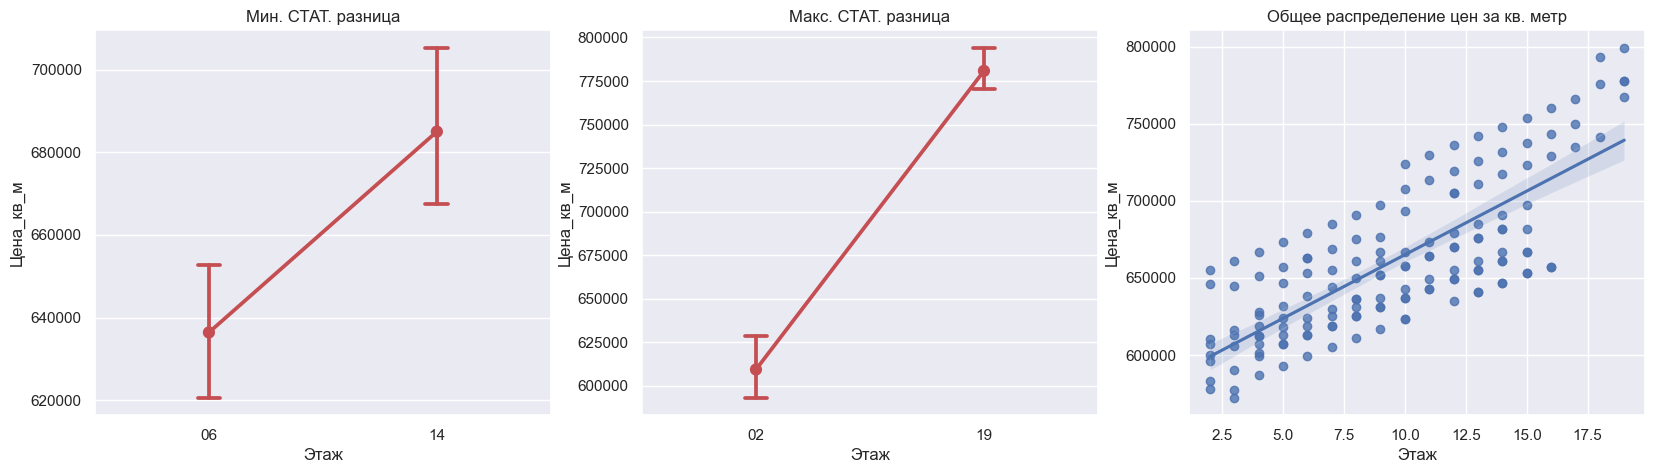

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey='col', sharex=False)

sns.pointplot(data=df_cur_dev.query('Этаж == 6 or Этаж == 14').sort_values(by='Этаж_как_строка'),
              y='Цена_кв_м',
              x='Этаж_как_строка', capsize = .1, color='r', ax=axes[0]).set_title('Мин. СТАТ. разница')

sns.pointplot(data=df_cur_dev.query('Этаж == 2 or Этаж == 19').sort_values(by='Этаж_как_строка'),
              y='Цена_кв_м',
              x='Этаж_как_строка', capsize = .1, color='r', ax=axes[1]).set_title('Макс. СТАТ. разница')


sns.regplot(data=df_cur_dev.sort_values(by='Этаж'), y='Цена_кв_м',x='Этаж', ax=axes[2]).set_title('Общее распределение цен за кв. метр')
for ax in axes.flatten():
    ax.xaxis.set_label_text('Этаж')

plt.show()

**Пояснение к графику**: Верхний и нижний усы, исходящие от точек - это доверительные интервалы, в которых могли бы лежать средние цены кв. метра.

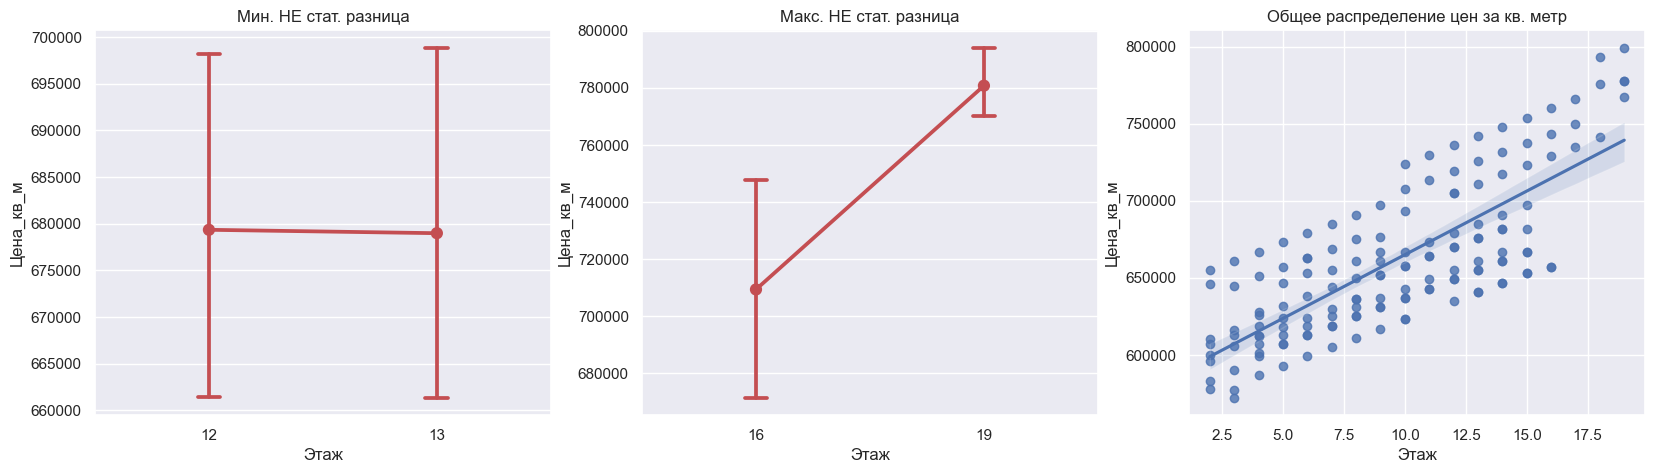

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey='col', sharex=False)


sns.pointplot(data=df_cur_dev.query('Этаж == 12 or Этаж == 13').sort_values(by='Этаж_как_строка'),
              y='Цена_кв_м',
              x='Этаж_как_строка', capsize = .1, color='r', ax=axes[0]).set_title('Мин. НЕ стат. разница')


sns.pointplot(data=df_cur_dev.query('Этаж == 16 or Этаж == 19').sort_values(by='Этаж_как_строка'),
              y='Цена_кв_м',
              x='Этаж_как_строка', capsize = .1, color='r', ax=axes[1]).set_title('Макс. НЕ стат. разница')

sns.regplot(data=df_cur_dev.sort_values(by='Этаж'), y='Цена_кв_м',x='Этаж', ax=axes[2]).set_title('Общее распределение цен за кв. метр')
for ax in axes.flatten():
    ax.xaxis.set_label_text('Этаж')

plt.show()

## Вывод относительно ЖК Ренессанс (Москва):
- **60.4% квартир положительно коррелируют между ценой за кв. метр и этажом.** Т.е. чем выше этаж, тем выше цена кв. метра. Но это еще не говорит о том, что этаж является единственной переменной, которая влияет на цену кв. метра. Мы лишь говорим о том, была ли задетектирована корреляция между зависимой переменной (Цена кв. метра) и независимой (Этаж).
- **Всего попарных сравнений этажей = 153**
    - Из них **82** пары этажей **не имеют** стат значимых различий в средних ценах за кв. метр
    - **71** пара этажей **имеют стат значимые различия** в средних ценах за кв. метр
- **Стат. значимые различия:**
    - Минимальная разница составила **48 590**. 6-й и 14-й этажи.
    - Максимальная разница составила **171 375**. 2-й и 19-й этажи.
- **Не значимые различия:**
    - Минимальная разница составила **364**. 12-й и 13-й этажи.
    - Максимальная разница составила **71 392**. 16-й и 19-й этажи.

Text(0.5, 1.0, 'Средняя цена кв. метра в разрезе этажей')

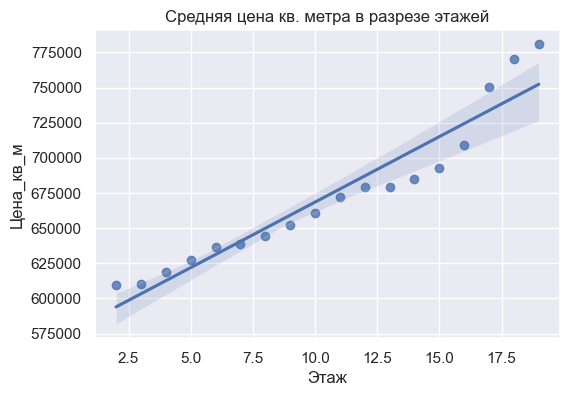

In [33]:
sns.regplot(data=df_cur_dev.groupby(['Этаж', 'Этаж_как_строка'], as_index=False)\
            .agg({'Цена_кв_м' : 'mean'})\
            .sort_values(by='Этаж'),
            y='Цена_кв_м',x='Этаж')
plt.title('Средняя цена кв. метра в разрезе этажей')